In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [217]:
# load preprepared merged file for EDA1 assignment focus 
df = pd.read_csv('data/Merged_bank_data.csv')
df.head()

,ID,Y,age,job,marital,education,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,000DYWU0VS,no,31,blue-collar,married,basic.6y,no,yes,no,telephone,...,55,12,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
1,000MW30CV5,no,46,entrepreneur,married,unknown,unknown,yes,no,telephone,...,160,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,001OSJ7YP2,no,45,management,married,university.degree,no,no,yes,cellular,...,391,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
3,00331JKVWQ,no,37,services,married,high.school,no,no,no,cellular,...,497,5,999,2,failure,-1.8,92.893,-46.2,1.291,5099.1
4,0037XS88TU,no,33,blue-collar,single,basic.4y,no,no,no,telephone,...,119,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0


In [218]:
df.drop('ID', axis=1, inplace=True)

In [219]:
# transform head read so view cols at one glance
df.head().T

,0,1,2,3,4
Y,no,no,no,no,no
age,31,46,45,37,33
job,blue-collar,entrepreneur,management,services,blue-collar
marital,married,married,married,married,single
education,basic.6y,unknown,university.degree,high.school,basic.4y
default,no,unknown,no,no,no
housing,yes,yes,no,no,no
loan,no,no,yes,no,no
contact,telephone,telephone,cellular,cellular,telephone
month,jun,may,nov,may,may


Review of DF - cols, shape, unique values, dedscribe, dtypes

In [220]:
# list name of all cols
df.columns

Index(['Y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [221]:
# shape of the df
df.shape

(41188, 21)

In [222]:
# view unique values in each feature of df
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

Y
['no' 'yes']
------------------------------------------------------------
age
[31 46 45 37 33 30 41 48 28 42 29 39 47 32 24 36 50 51 34 35 44 38 57 25
 58 49 19 56 43 27 78 26 23 55 40 66 54 52 60 69 53 68 59 84 75 21 22 20
 82 73 83 62 18 92 88 65 72 76 85 77 74 61 70 71 63 64 81 80 79 86 17 67
 91 98 89 95 87 94]
------------------------------------------------------------
job
['blue-collar' 'entrepreneur' 'management' 'services' 'admin.'
 'technician' 'self-employed' 'unknown' 'housemaid' 'unemployed' 'student'
 'retired']
------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------
education
['basic.6y' 'unknown' 'university.degree' 'high.school' 'basic.4y'
 'basic.9y' 'professional.course' 'illiterate']
------------------------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------------------------
housing
['yes' '

In [223]:
# list of numerical cols
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [224]:
# list of categorical cols
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['Y',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [225]:
print("\n>> Dtypes:\n{}".format(df.dtypes))



>> Dtypes:
Y                  object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object


In [226]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [227]:
print(df["Y"].value_counts())

no     36548
yes     4640
Name: Y, dtype: int64


Numerical data analysis

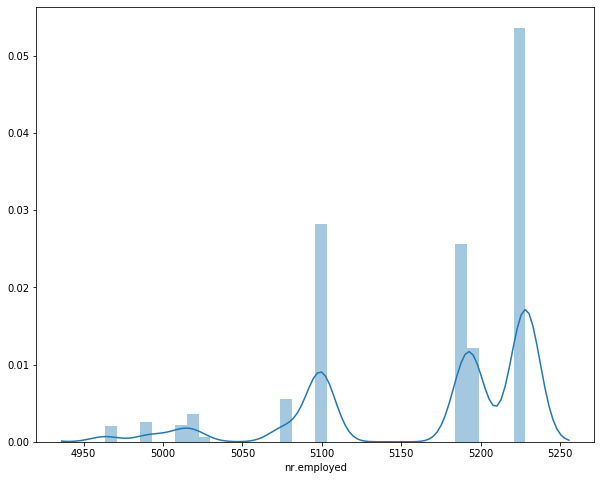

In [228]:
plt.figure(figsize=(10,8))
sns.distplot(df["nr.employed"])

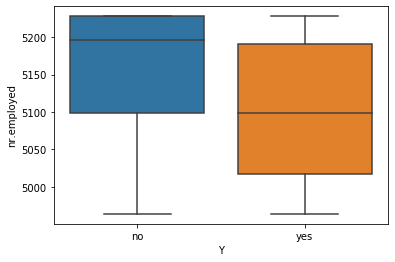

In [229]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="nr.employed")
plt.show()

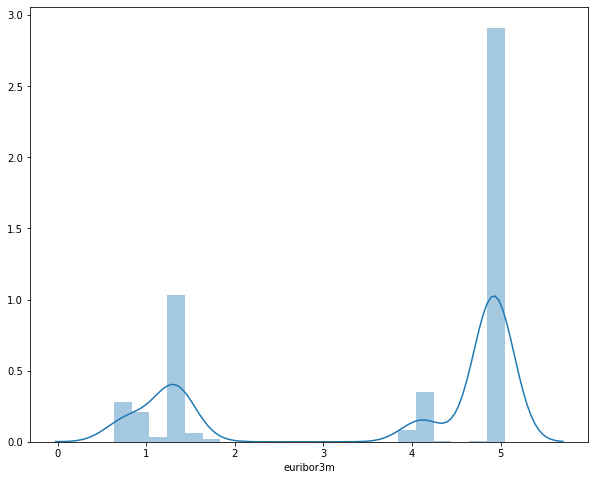

In [230]:
plt.figure(figsize=(10,8))
sns.distplot(df["euribor3m"])

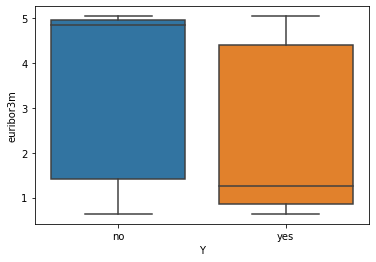

In [231]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="euribor3m")
plt.show()

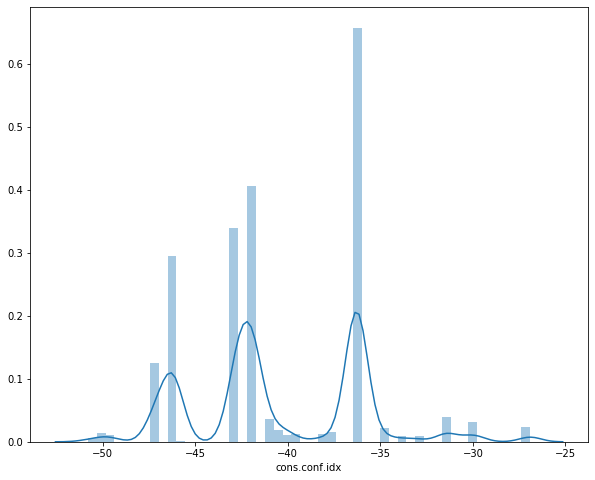

In [232]:
plt.figure(figsize=(10,8))
sns.distplot(df["cons.conf.idx"])

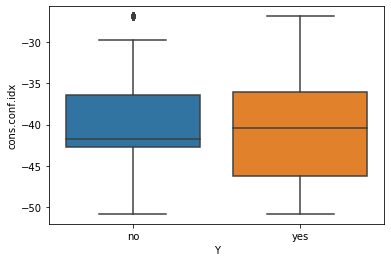

In [233]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="cons.conf.idx")
plt.show()

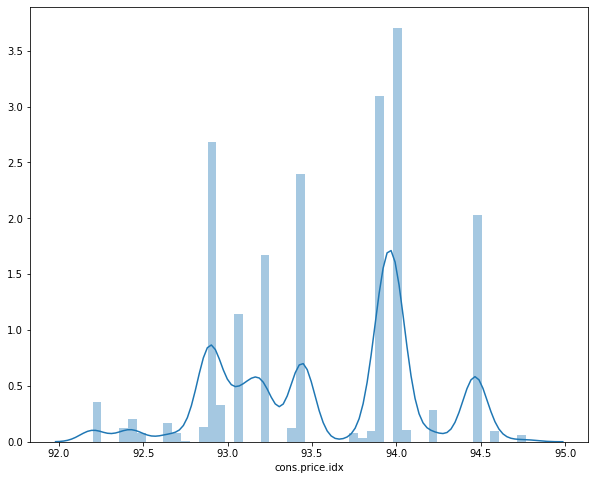

In [234]:
plt.figure(figsize=(10,8))
sns.distplot(df["cons.price.idx"])

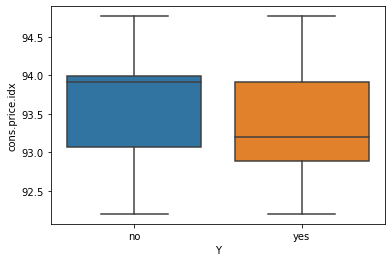

In [235]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="cons.price.idx")
plt.show()

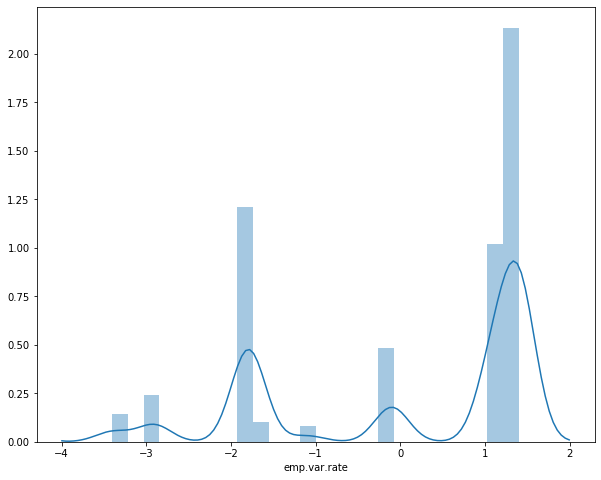

In [236]:
plt.figure(figsize=(10,8))
sns.distplot(df["emp.var.rate"])

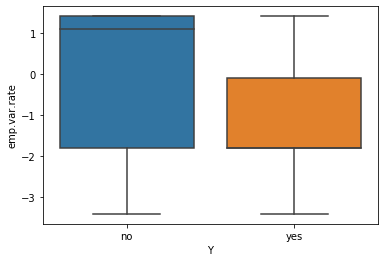

In [237]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="emp.var.rate")
plt.show()

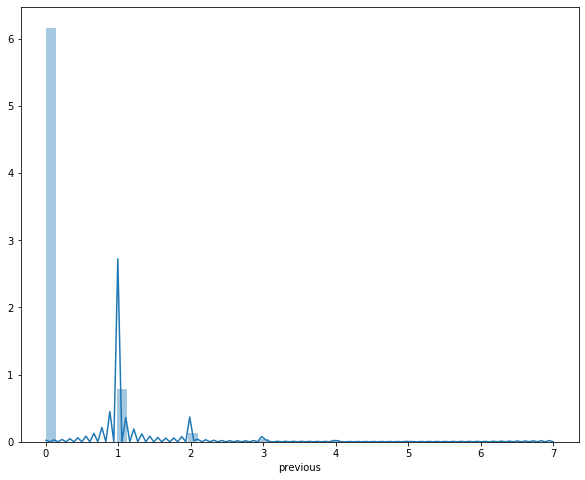

In [238]:
plt.figure(figsize=(10,8))
sns.distplot(df["previous"])

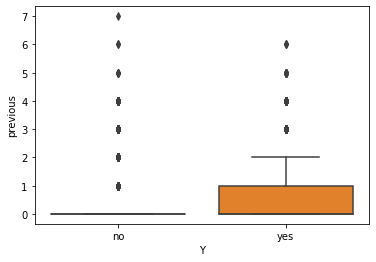

In [239]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="previous")
plt.show()

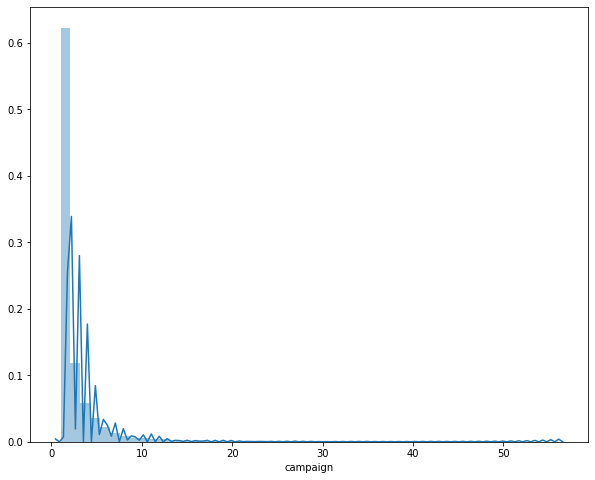

In [240]:
plt.figure(figsize=(10,8))
sns.distplot(df["campaign"])

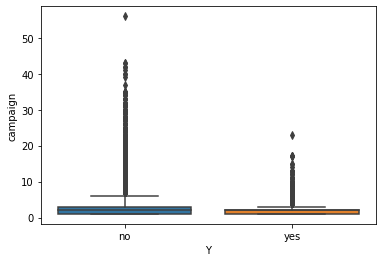

In [241]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="campaign")
plt.show()

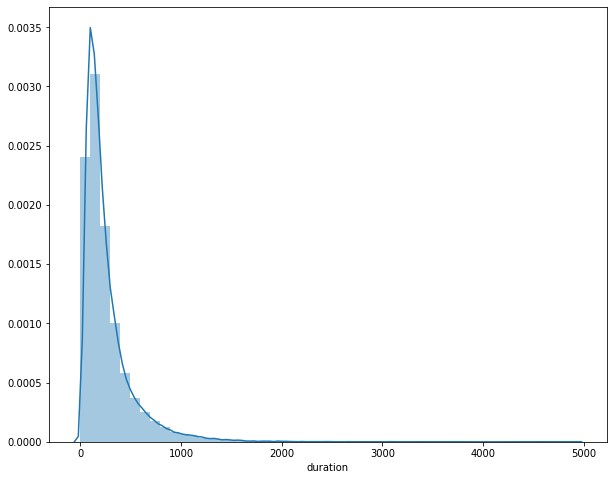

In [242]:
plt.figure(figsize=(10,8))
sns.distplot(df["duration"])

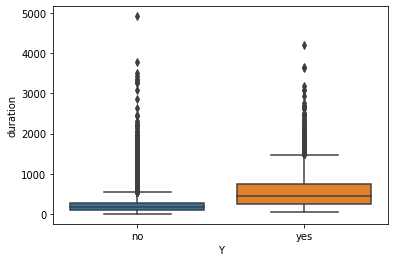

In [243]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="duration")
plt.show()

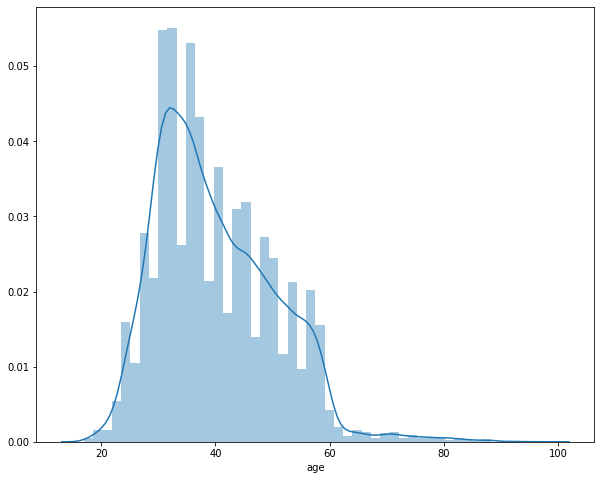

In [244]:
plt.figure(figsize=(10,8))
sns.distplot(df["age"])

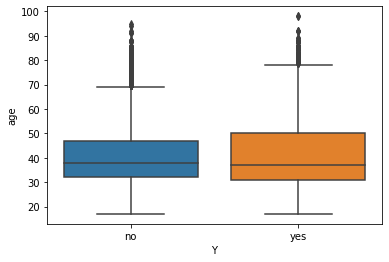

In [245]:
%matplotlib inline
sns.boxplot(data=df, x="Y", y="age")
plt.show()

Categorical data analysis

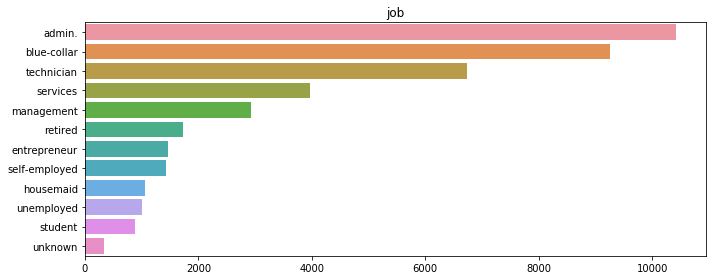

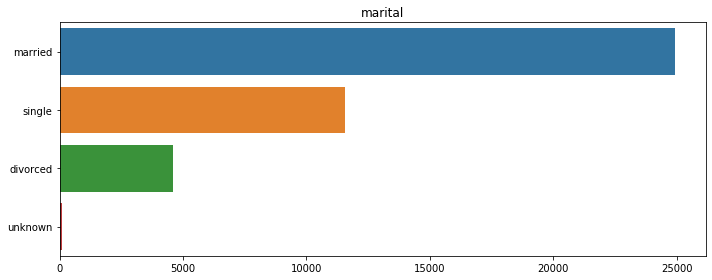

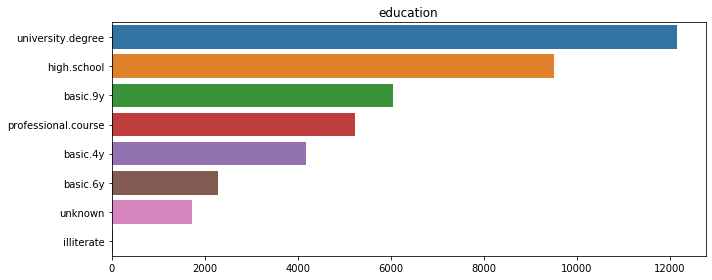

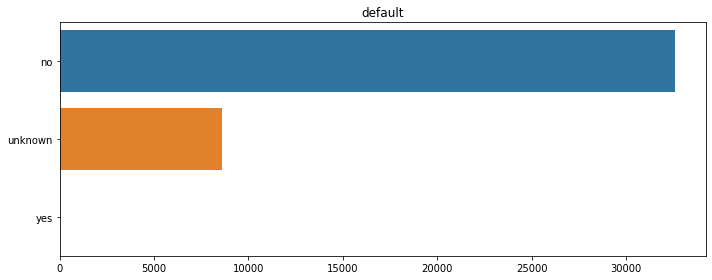

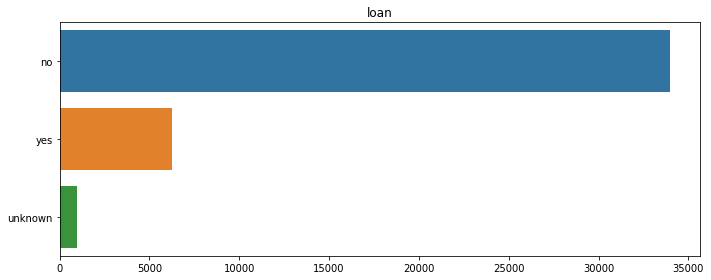

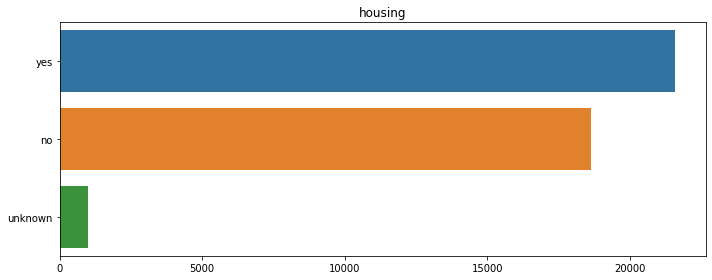

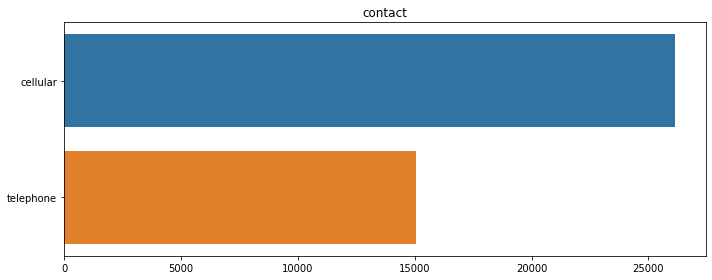

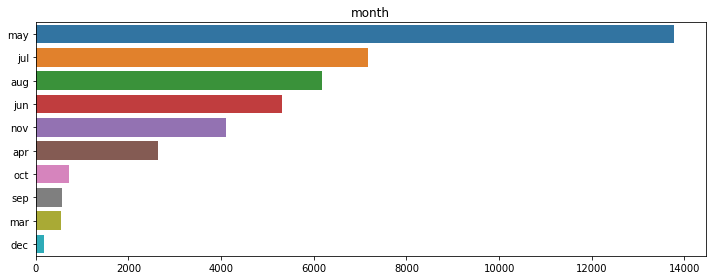

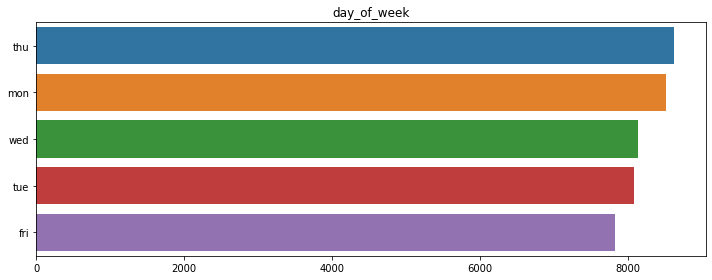

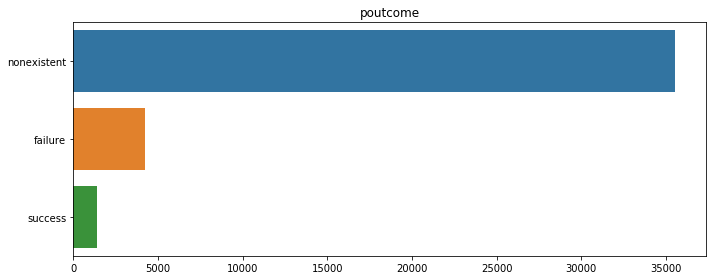

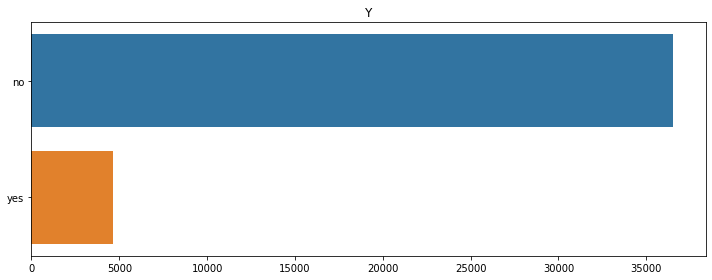

In [246]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'Y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot( df[col].value_counts().values,  df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.legend

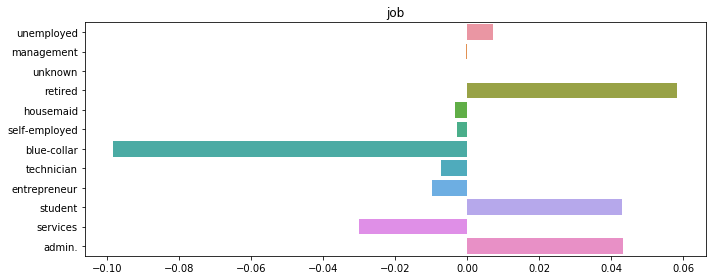

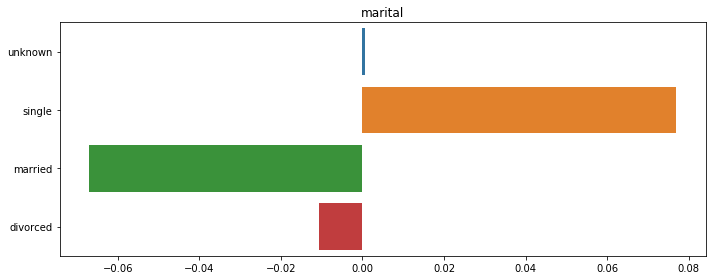

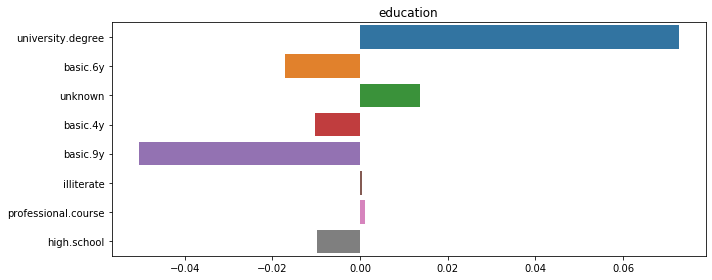

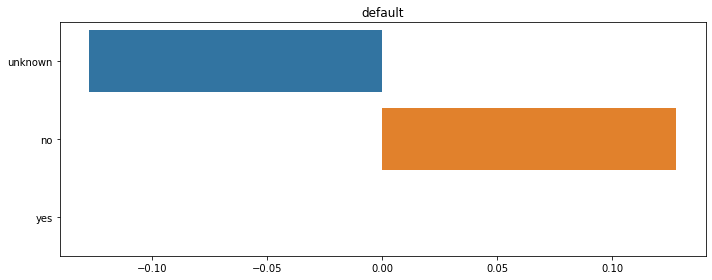

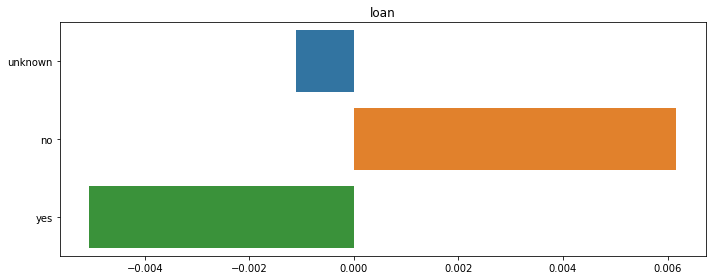

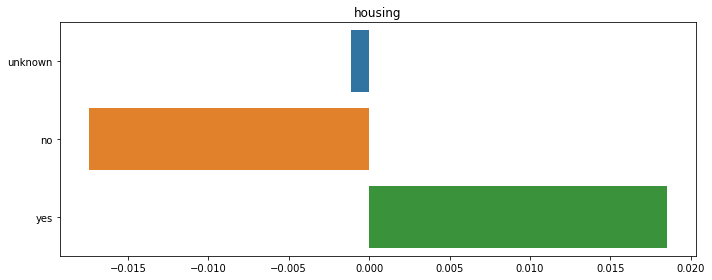

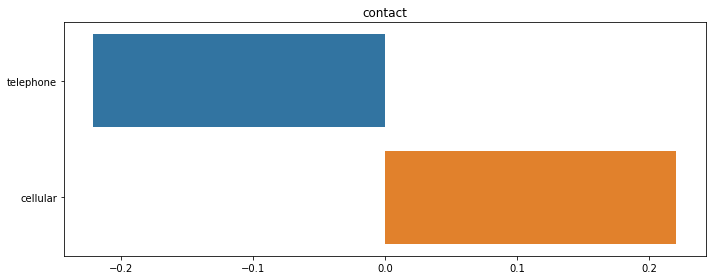

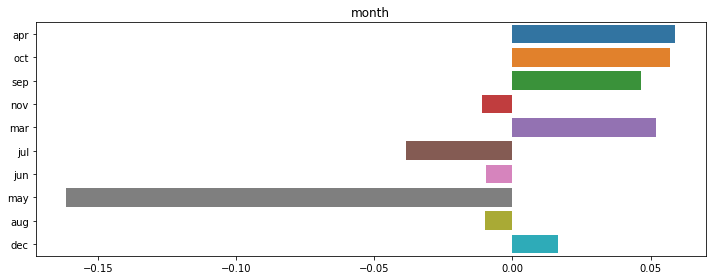

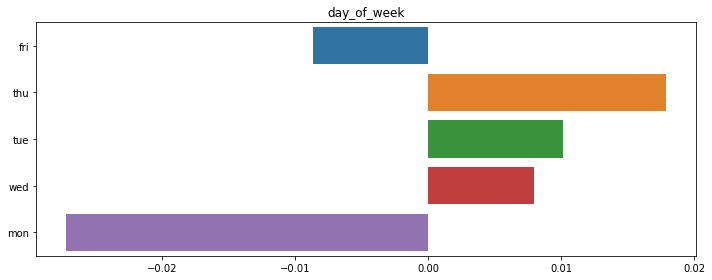

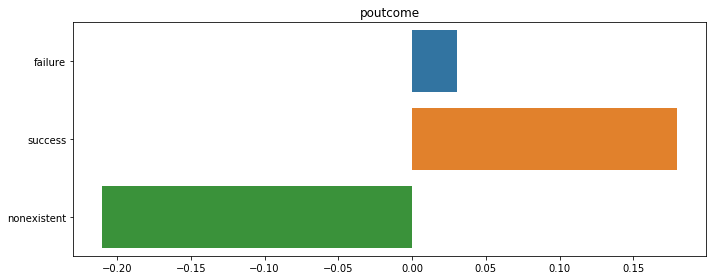

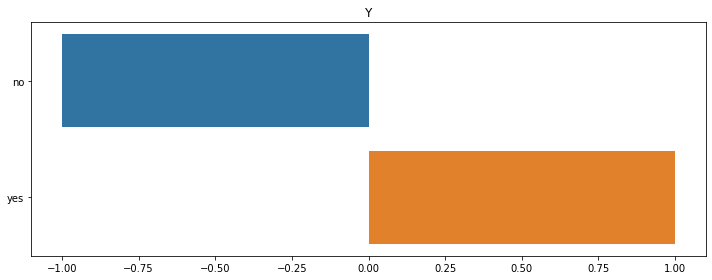

In [247]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'Y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.Y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.Y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.Y.values == 'yes').sum()
    freq_neg = (df.Y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

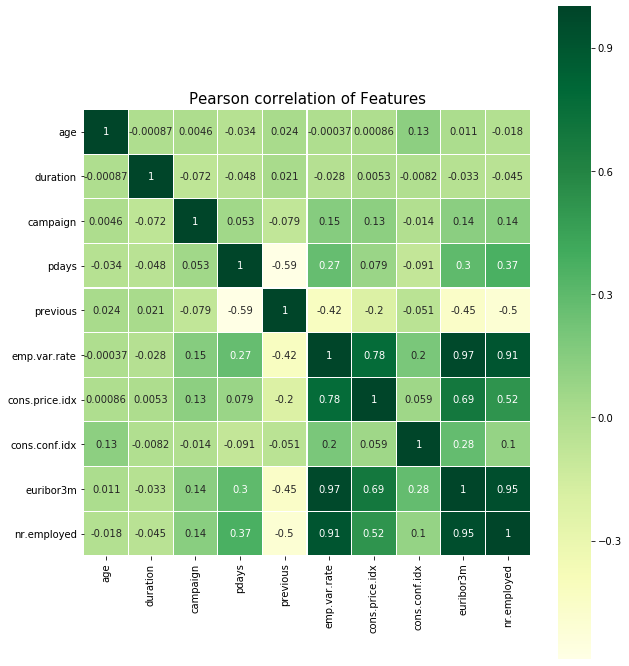

In [248]:
#From the heatmap we can see that there are some numerical features which share a high correlation between them, 
# e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate 
# share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Data Processing

Missing / Unknown Value

In [249]:
df.default.replace('unknown','no',inplace=True)

In [250]:
df['default'] = df.default.replace('unknown',df.default.mode([0]))

In [251]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [252]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [253]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [254]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [255]:
df['Y'].replace({'no':0,'yes':1},inplace=True)

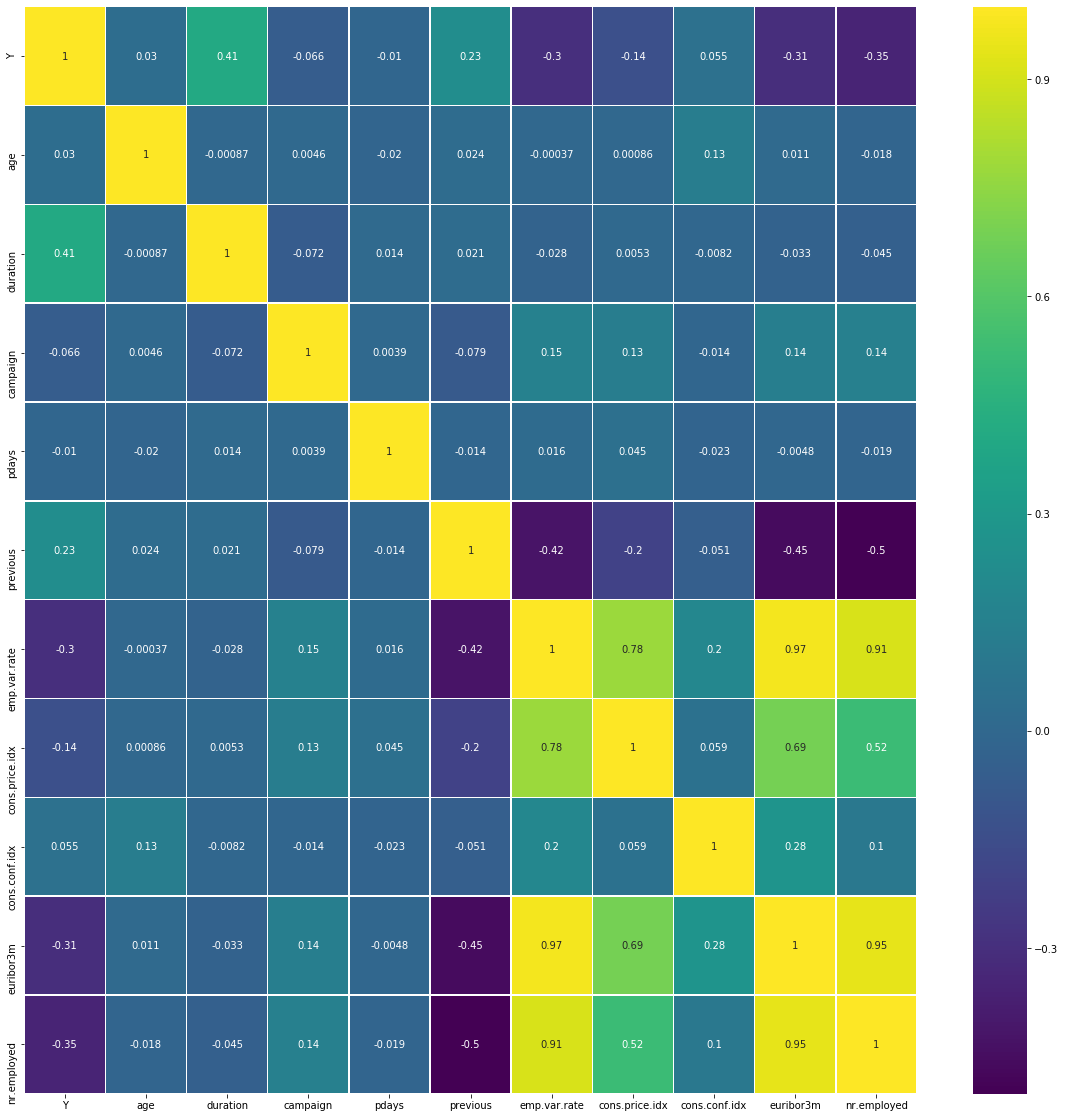

In [256]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [257]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

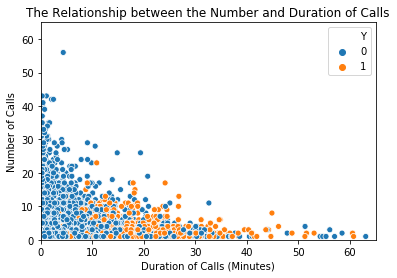

In [258]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'Y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [259]:
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [260]:
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

In [262]:
labelenc = LabelEncoder()
df[categorical_variables] = df[categorical_variables].apply(LabelEncoder().fit_transform)

In [263]:
X = df.drop(['Y','duration'],1)
y = df['Y']

In [264]:
X_train_im, X_test_im, y_train_im, y_test_im= train_test_split(X,y, test_size=0.3, random_state=0)

In [279]:
clf = LogisticRegression()
clf.fit(X_train_im, y_train_im)
y_pred_im = clf.predict_proba(X_test_im)

print('Accuracy on test set: {0:.4f}'.format(accuracy_score(y_test_im, clf.predict(X_test_im))))
print('Percision score on test set: {0:.4f}'.format(precision_score(y_test_im, clf.predict(X_test_im))))
print('Recall score on test set: {0:.4f}'.format(recall_score(y_test_im, clf.predict(X_test_im))))
print('F1 score on test set: {0:.4f}'.format(f1_score(y_test_im, clf.predict(X_test_im))))
print("AUC score: ", roc_auc_score(y_test_im, y_pred_im[:,1]))


C:\Users\rosie\Miniconda3\envs\ads04\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on test set: 0.9012
Percision score on test set: 0.7146
Recall score on test set: 0.2267
F1 score on test set: 0.3442
AUC score:  0.7847938015010887


In [267]:
X_train_b, X_test_b, y_train_b, y_test_b= train_test_split(X,y, test_size=0.3, random_state=0)

In [280]:
clf_b = LogisticRegression(class_weight='balanced')
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict_proba(X_test_b)

print('Accuracy on test set: {0:.4f}'.format(accuracy_score(y_test_b, clf_b.predict(X_test_b))))
print('Percision score on test set: {0:.4f}'.format(precision_score(y_test_b, clf_b.predict(X_test_b))))
print('Recall score on test set: {0:.4f}'.format(recall_score(y_test_b, clf_b.predict(X_test_b))))
print('F1 score on test set: {0:.4f}'.format(f1_score(y_test_b, clf_b.predict(X_test_b))))
print("AUC score: ", roc_auc_score(y_test_b, y_pred_b[:,1]))

C:\Users\rosie\Miniconda3\envs\ads04\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on test set: 0.7913
Percision score on test set: 0.3069
Recall score on test set: 0.6557
F1 score on test set: 0.4181
AUC score:  0.7894488673097342


In [284]:
#Initialising Random Forest model
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

#Fitting on data
rf_clf.fit(X_train_im, y_train_im)

#Scoring the model on train data
score_rf=rf_clf.score(X_train_im, y_train_im)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf=rf_clf.score(X_test_im, y_test_im)
print("Testing score: %.2f " % score_rf)

y_pred_rf = rf_clf.predict(X_test_im)
print('Accuracy on test set: {0:.4f}'.format(accuracy_score(y_test_im, rf_clf.predict(X_test_im))))
print('Percision score on test set: {0:.4f}'.format(precision_score(y_test_im, rf_clf.predict(X_test_im))))
print('Recall score on test set: {0:.4f}'.format(recall_score(y_test_im, rf_clf.predict(X_test_im))))
print('F1 score on test set: {0:.4f}'.format(f1_score(y_test_im, rf_clf.predict(X_test_im))))


Training score: 0.90 
Testing score: 0.90 
Accuracy on test set: 0.9007
Percision score on test set: 0.7371
Recall score on test set: 0.2038
F1 score on test set: 0.3194


In [272]:
#Initialising Random Forest model
rf_clf_b=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100, class_weight='balanced')

#Fitting on data
rf_clf_b.fit(X_train_b, y_train_b)

#Scoring the model on train data
score_rf_b=rf_clf_b.score(X_train_b, y_train_b)
print("Training score: %.2f " % score_rf)

#Scoring the model on test_data
score_rf_b=rf_clf_b.score(X_test_b, y_test_b)
print("Testing score: %.2f " % score_rf)

y_pred_rf_b= rf_clf_b.predict(X_test_b)
print('Accuracy on test set: {0:.4f}'.format(accuracy_score(y_test_b, rf_clf_b.predict(X_test_b))))
print('Percision score on test set: {0:.4f}'.format(precision_score(y_test_b, rf_clf_b.predict(X_test_b))))
print('Recall score on test set: {0:.4f}'.format(recall_score(y_test_b, rf_clf_b.predict(X_test_b))))
print('F1 score on test set: {0:.4f}'.format(f1_score(y_test_b, rf_clf_b.predict(X_test_b))))

Training score: 0.90 
Testing score: 0.90 
Accuracy on test set: 0.8315
Percision score on test set: 0.3651
Recall score on test set: 0.6415
F1 score on test set: 0.4654
